### onion Brownian experiment

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from trackpy_package import Experiment

In [2]:
cwd = os.getcwd() # Get path to directory that this notebook is being run in
experiment_path = os.path.join(cwd, 'onion') # Create path to experiment folder, which contains trial folders
dat = Experiment(experiment_dir_path=experiment_path, microns_per_pixel=0.1966, filter=True, median=True)
print(dat.trials.keys())

dict_keys(['5_brownian', '4_brownian', '2_brownian', '3_brownian', '6_brownian', '1_brownian'])


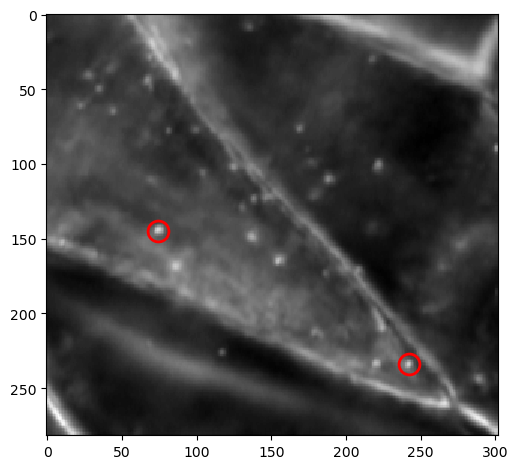

In [5]:
fig, ax = plt.subplots(layout='tight')
ax = dat.locate(
    trial_name='1_brownian',
    frame_num=1,
    diameter=5,
    minmass=90,
    separation=20
)

# fig.savefig('good.png')

Setting all trials to same parameters for now

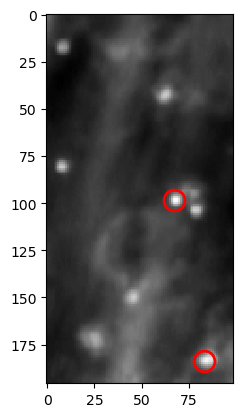

5_brownian


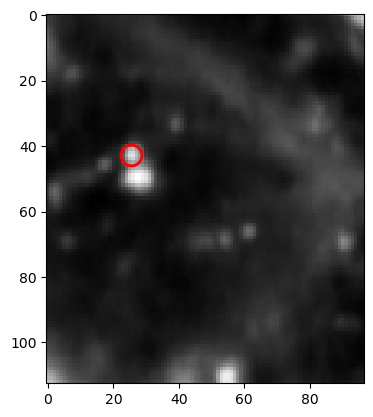

4_brownian


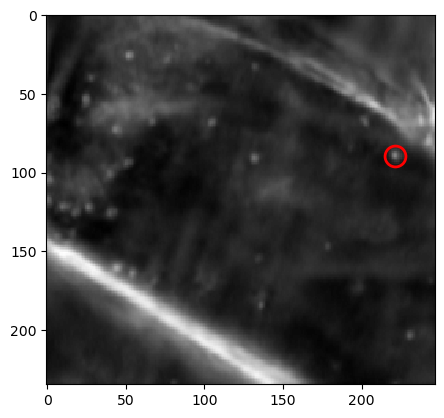

2_brownian


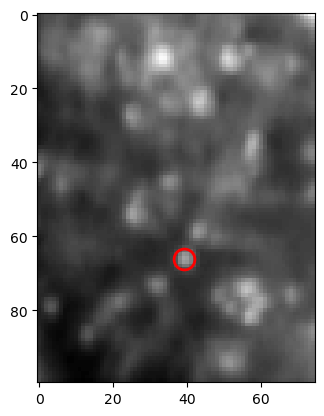

3_brownian


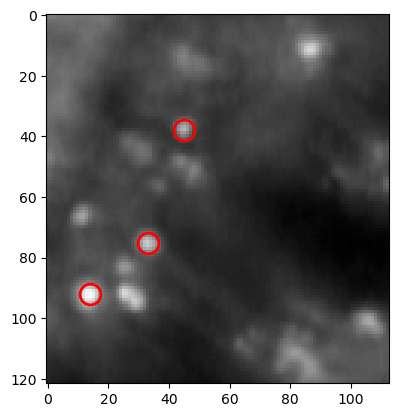

6_brownian


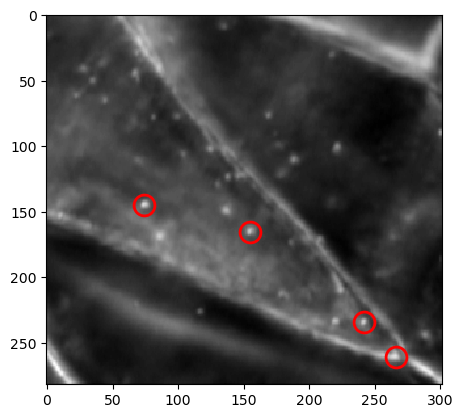

1_brownian


In [6]:
for tname in dat.trials.keys():
    dat.locate(
        trial_name=tname,
        frame_num=1,
        diameter=5,
        minmass=72,
        separation=20
    )
    print(tname)

Once all `diameter` and `minmass` are filled for each trial, call `batch_all()` to call batch on all trials.

In [7]:
dat.batch_all()

Frame 155: 7 features
Success!


Then call `link_all()` to track particle trajectories for each trial

In [8]:
dat.link_all()

Frame 155: 7 trajectories present.
Success!


We can plot the trajectory for a trial using `plot_traj()`

Looks reasonable. We can also plot trajectories for all trials

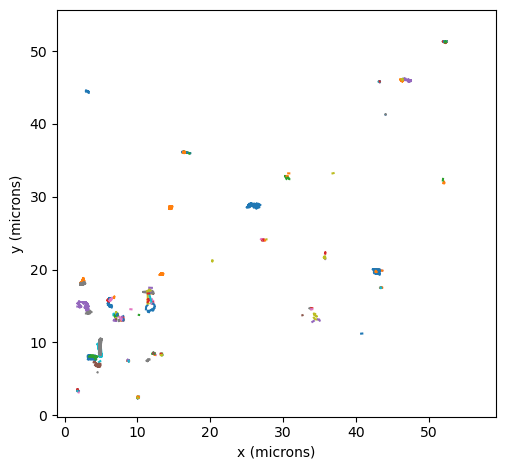

In [9]:
ax = dat.plot_traj_all()
fig = ax.get_figure()
fig.set_tight_layout(True)
ax.set_xlabel('x (microns)')
ax.set_ylabel('y (microns)')
ax.set_aspect('equal')

# fig.savefig('trajectories.png')

In [10]:
dat.remove(6)

5_brownian
Removed 52 particles!
4_brownian
Removed 8 particles!
2_brownian
Removed 30 particles!
3_brownian
Removed 73 particles!
6_brownian
Removed 14 particles!
1_brownian
Removed 109 particles!


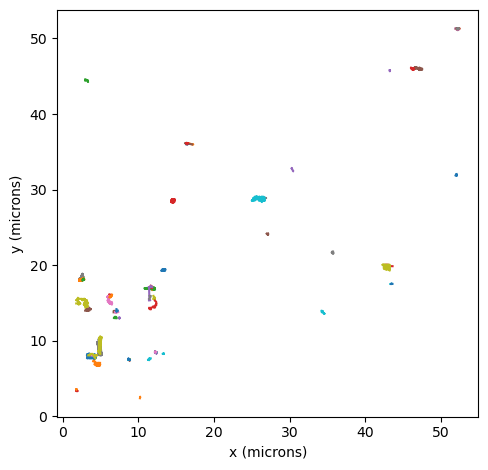

In [11]:
ax = dat.plot_traj_all()
fig = ax.get_figure()
fig.set_tight_layout(True)
ax.set_xlabel('x (microns)')
ax.set_ylabel('y (microns)')
ax.set_aspect('equal')

# fig.savefig('trajectories.png')

Get diffusion coefficient of each particle in a trial using below function

In [12]:
coeff, err = dat.get_diffusion_coefficient_experiment()

[6.08823717e-14 2.30696885e-12 1.12300899e-13 1.77674112e-13
 1.04828421e-13 6.94250341e-13 1.03443738e-13 1.39986702e-13
 2.56730389e-13 5.80977001e-14 1.75857280e-13 1.67556557e-15
 5.94869632e-14 1.28503321e-13 3.47216858e-14 2.28880830e-13
 6.78341825e-14] [5.98038595e-15 1.36306155e-12 3.99502004e-14 5.22871830e-14
 2.21362233e-14 5.40318405e-13 1.82360486e-14 7.05111785e-14
 2.87905895e-14 1.37005553e-14 3.57326410e-14 5.06360020e-16
 2.91494007e-14 2.98886582e-14 1.93666221e-14 4.52414785e-14
 3.78726960e-14]
[1.98492907e-12 5.66984249e-12] [5.14602109e-13 1.37339915e-12]
[3.53552604e-14 3.71611857e-14] [1.88942019e-14 1.77988762e-14]
[1.69700920e-13 4.51489739e-12 2.25665760e-13 2.29776390e-12
 1.52140705e-13 1.13162737e-13 2.02787468e-13 1.72323985e-13
 5.49306394e-14 1.30086856e-13 3.61856376e-14 2.67200277e-13
 2.17402380e-13 6.21556541e-14] [6.66019105e-14 2.21595506e-12 4.73261202e-14 2.11852208e-12
 3.22689790e-14 2.87658569e-14 8.03986992e-14 3.83111160e-14
 1.53033279e-

In [13]:
a = f"{coeff:0.3e}"[:-4]
ex = f"{coeff:0.3e}"[-3:]
aerr = f"{err:0.3e}"[:-4]
exerr = f"{err:0.3e}"[-3:]

print(f"${a}\\times10^{{{ex}}}\\pm{aerr}\\times10^{{{exerr}}}$")

$3.073\times10^{-14}\pm2.028\times10^{-28}$


In [14]:
dat = np.array([1.057e-13,5.297e-14,3.776e-15,4.644e-15,1.232e-15])

In [15]:
print(np.mean(dat))

3.36644e-14


In [16]:
print(np.std(dat)/np.sqrt(len(dat)))

1.8274785360381118e-14
